Elaborar gráficos de ciclos termodinámicos usando la librería CoolProp ejecutada desde Python.

Para ello, se exponen dos metodologías:
- La informal.
- La formal.

Todo implementado dentro del contexto de ciclos de refrigeración.


Importar librerías van a ayudar para este problema

In [2]:
import CoolProp.CoolProp as cp
import numpy as np
import matplotlib.pyplot as plt

Consideremos un ciclo de refrigeración de fluido R134a con una etapa de calentamiento intermedia (intercooler).

Primero, se plantean los datos del problema:

In [4]:
# Datos del problema

# Punto 3
T_3 = 40 + 273.153 # K

# Punto 4
T_4 = 28 + 273.153 # K

# Punto 5
T_5 = -10 + 273.153 # K

# Punto 6
T_6 = -7 + 273.153 # K

# Adicionales
eta_comp = 0.87 # Eficiencia isentrópica del coompresor
fluid_a = "R134a"

Resolución del ciclo:

In [5]:
# Se asume del punto 3: x_3
x_3 = 0 # Calidad del líquido
P_3 = cp.PropsSI("P", "T", T_3, "Q", x_3, fluid_a) # Pa - Presión de condensación
h_3 = cp.PropsSI("H", "T", T_3, "Q", x_3, fluid_a) # J/kg

# Se asumen también procesos isobáricos
P_4 = P_3
h_4 = cp.PropsSI("H", "P", P_4, "T", T_4, fluid_a) # J/kg

# Expansión isoentálpica
h_5 = h_4
P_5 = cp.PropsSI("P", "T", T_5, "Q", 0, fluid_a) # Pa - Presión de evaporación

P_6 = P_5
h_6 = cp.PropsSI("H", "P", P_6, "T", T_6, fluid_a) # J/kg
s_6 = cp.PropsSI("S", "P", P_6, "T", T_6, fluid_a) # J/kg-K

# Balance de energía en el IC
h_1 = h_6 + (h_3 - h_4) # J/kg
P_1 = P_6
s_1 = cp.PropsSI("S", "P", P_1, "H", h_1, fluid_a) # J/kg K

# Eficiencia isentrópica
P_2 = P_3
h_2s = cp.PropsSI("H", "P", P_2, "S", s_1, fluid_a) # J/kg
h_2 = h_1 + (eta_comp**(-1))*(h_2s - h_1) # J/kg

COP_P2_a = (h_6 - h_5)/(h_2 - h_1)

print(f"Coeficiente de desempeño: {COP_P2_a:.2f} [-]")

Coeficiente de desempeño: 3.59 [-]


Gráfico con método "Informal".

Se define así porque no se establecen los procesos de cambio de estado de los ciclos termodinámicos. Esto quiere decir que en caso de los ciclos de potencia, las expansiones del fluido en la turbina no seguirán una tendencia logarítmica. Para efectos de los ciclos de refrigeración, no hay mayores diferencias.

La metodología a seguir es la siguiente:

- Una vez con los estados termodinámicos definidos en todos los puntos del ciclo, se define un "conjunto de estados" usando la función:

```
StateContainer()
```
- Esa función es un "inicializador" del objeto "cycle", donde sus respectivos atributos corresponden a cada estado termodinámico del ciclo. 

- En cada estado termodinámico definiremos: Número, Temperatura, Presión, Volúmen específico, entalpía específica y entropía específica.

- Con esos puntos definidos, podemos crear los diagramas que deseemos.


In [6]:
# Importar librerías necesarias
import CoolProp
from CoolProp.Plots import PropertyPlot # Función que nos permite dibujar diagramas P-h o T-s
from CoolProp.Plots import StateContainer # Función para definir mi conjunto de propiedades TD

In [8]:
# Inicializamos el conjunto de estados

ref_cycle_intercooler = StateContainer()

# Estados de presión
ref_cycle_intercooler[1,"P"] = P_1
ref_cycle_intercooler[2,"P"] = P_2
ref_cycle_intercooler[3,"P"] = P_3
ref_cycle_intercooler[4,"P"] = P_4
ref_cycle_intercooler[5,"P"] = P_5
ref_cycle_intercooler[6,"P"] = P_6
ref_cycle_intercooler[7,"P"] = P_1

# Entalpía
ref_cycle_intercooler[1,"H"] = h_1
ref_cycle_intercooler[2,"H"] = h_2
ref_cycle_intercooler[3,"H"] = h_3
ref_cycle_intercooler[4,"H"] = h_4
ref_cycle_intercooler[5,"H"] = h_5
ref_cycle_intercooler[6,"H"] = h_6
ref_cycle_intercooler[7,"H"] = h_1

print(ref_cycle_intercooler)

Stored State Points:
state        T (K)       p (Pa)    d (kg/m3)     h (J/kg)   s (J/kg/K)
    1            -   200627.066            -   412796.306            -
    2            -  1016674.817            -   456359.387            -
    3            -  1016674.817            -   256413.724            -
    4            -  1016674.817            -   238843.200            -
    5            -   200627.066            -   238843.200            -
    6            -   200627.066            -   395225.782            -
    7            -   200627.066            -   412796.306            -



Comentario 1: Hay que definir siempre un punto adicional, el que nos permitirá cerrar el ciclo en el gráfico.

Comentario 2: Con la información que hay actualmente, se puede graficar un diagrama P-h. 

c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Plots.py:217: UserWarning: Detected an incomplete phase envelope, fixing it numerically.
  warnings.warn("Detected an incomplete phase envelope, fixing it numerically.")


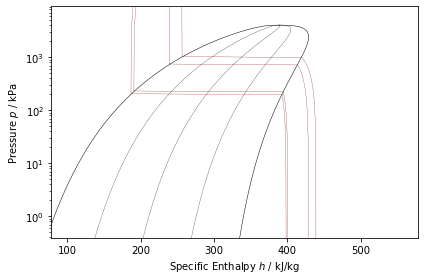

In [9]:
# Diagrama P-h

# Se llama primero al entorno PropertyPlot
ph_plot = PropertyPlot("R134a", "Ph")

# Definamos ahora isolíneas (Que serán de calidad de vapor y temperatura)

ph_plot.calc_isolines(CoolProp.iQ, num=5)
ph_plot.calc_isolines(CoolProp.iT, iso_range=[T_3, T_4, T_5, T_6], num=4) # Son isolíneas de temperatura en los límites del problema
ph_plot.show()

Notemos que en el gráfico entregado, la presión está en kPa, lo cual es fundamental a tener en cuenta para efectos de ingresar los límites de la presión. De todas maneras, esto se puede modificar.

c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Plots.py:301: UserWarning: You called the function "draw_process", which is not tested.
  warnings.warn("You called the function \"draw_process\", which is not tested.", UserWarning)


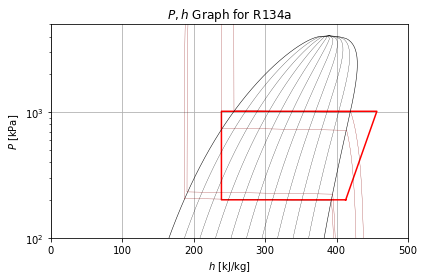

In [10]:
ph_plot = PropertyPlot("R134a", "Ph") # Objeto gráfico
ph_plot.calc_isolines(CoolProp.iQ, num=11)
ph_plot.calc_isolines(CoolProp.iT, iso_range=[T_3, T_4, T_5, T_6], num=4)
# Configuramos y dibujamos el ciclo

# Las configuraciones se hacen igual que con matplotlib
ph_plot.title(r'$P,h$ Graph for R134a')
ph_plot.xlabel(r'$h$ [kJ/kg]')
ph_plot.ylabel(r'$P$ [kPa]') # Indicando que mi eje estará en kPa
ph_plot.set_axis_limits([0, 500, 100, 5000]) # Entregar en kPa
ph_plot.grid()
# NOTA: h y s también están en kJ/kg y kJ/kg K respectivamente
# Creamos el ciclo
ph_plot.draw_process(ref_cycle_intercooler)
ph_plot.show()

Veamos el diagrama T-s

In [11]:
# Calcular temperatura y entropía 
# Temperatura y entropía punto 1
T_1 = cp.PropsSI("T", "P", P_1, "H", h_1, fluid_a)
ref_cycle_intercooler[1,"T"] = T_1
ref_cycle_intercooler[1,"S"] = s_1

# Temperatura y entropía punto 2
T_2 = cp.PropsSI("T", "P", P_2, "H", h_2, fluid_a)
s_2 = cp.PropsSI("S", "P", P_2, "H", h_2, fluid_a)
ref_cycle_intercooler[2,"T"] = T_2
ref_cycle_intercooler[2,"S"] = s_2

# Temperatura y entropía punto 3
s_3 = cp.PropsSI("S", "P", P_3, "H", h_3, fluid_a)
ref_cycle_intercooler[3,"T"] = T_3
ref_cycle_intercooler[3,"S"] = s_3

# Temperatura y entropía punto 4
s_4 = cp.PropsSI("S", "P", P_4, "H", h_4, fluid_a)
ref_cycle_intercooler[4,"T"] = T_4
ref_cycle_intercooler[4,"S"] = s_4

# Temperatura y entropía punto 5
s_5 = cp.PropsSI("S", "P", P_5, "H", h_5, fluid_a)
ref_cycle_intercooler[5,"T"] = T_5
ref_cycle_intercooler[5,"S"] = s_5

# Temperatura y entropía punto 6
s_6 = cp.PropsSI("S", "P", P_6, "H", h_6, fluid_a)
ref_cycle_intercooler[6,"T"] = T_6
ref_cycle_intercooler[6,"S"] = s_6

# Temperatura y entropía punto 7
ref_cycle_intercooler[7,"T"] = T_1
ref_cycle_intercooler[7,"S"] = s_1

print(ref_cycle_intercooler)

Stored State Points:
state        T (K)       p (Pa)    d (kg/m3)     h (J/kg)   s (J/kg/K)
    1      286.747   200627.066            -   412796.306     1806.602
    2      347.575  1016674.817            -   456359.387     1823.024
    3      313.153  1016674.817            -   256413.724     1190.491
    4      301.153  1016674.817            -   238843.200     1133.287
    5      263.153   200627.066            -   238843.200     1148.808
    6      266.153   200627.066            -   395225.782     1743.018
    7      286.747   200627.066            -   412796.306     1806.602



c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 200627.066043, 2761.539828 with index (249,): unable to solve 1phase PY flash with Tmin=263.162, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [281.765 J/mol/K] is above the maximum value of 281.328037347 J/mol/K
  warnings.warn(
c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 1016674.816556, 2629.609551 with index (235,): unable to solve 1phase PY flash with Tmin=313.164, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [268.304 J/mol/K] is above the maximum value of 267.587636781 J/mol/K
  warnings.warn(
c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 1016674.816556, 2639.033142 with i

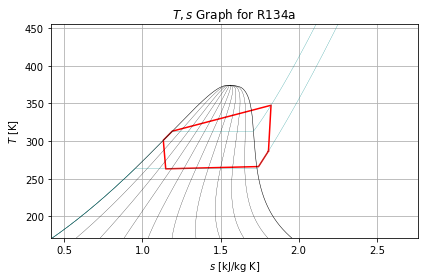

In [12]:
ph_plot = PropertyPlot("R134a", "Ts")
ph_plot.calc_isolines(CoolProp.iQ, num=11)
ph_plot.calc_isolines(CoolProp.iP, iso_range=[P_1/1000, P_2/1000], num=2)
# Configuramos y dibujamos el ciclo

# Las configuraciones se hacen igual que con matplotlib
ph_plot.title(r'$T,s$ Graph for R134a')
ph_plot.xlabel(r'$s$ [kJ/kg K]')
ph_plot.ylabel(r'$T$ [K]')
#ph_plot.set_axis_limits([0, 500, 100, 5000])
ph_plot.grid()

# Creamos el ciclo
ph_plot.draw_process(ref_cycle_intercooler)
ph_plot.show()

Como vemos, este polígono no tiene mucho sentido respecto a los procesos que están ocurriendo. Esto es porque esta metodología en los diagramas T-s no funciona bien, ya el conjunto de estados que le estamos pasando a CoolProp son puntos en el espacio, y al momento de dibujar los procesos de compresión/expansión no isentrópicos, sólo une los puntos que le pasamos.

Entonces hay que definir puntos intermedios. 

- De 2 a 3, definiremos un intermedio en la curva de saturación.
- De 5 a 6, ÍDEM.

Tendremos que mover los índices del StateContainer.

In [13]:
# Punto 1 y 2 se mantienen.

# Punto 3 va a ser el estado de saturación que deseamos
T_3_p = T_3 # Temperatura de saturación
x_3_p = 1 # Vapor saturado
P_3_p = P_3
s_3_p = cp.PropsSI("S", "P", P_3, "Q", x_3_p, fluid_a)
h_3_p = cp.PropsSI("H", "P", P_3, "Q", x_3_p, fluid_a)
ref_cycle_intercooler[3,"T"] = T_3_p
ref_cycle_intercooler[3,"S"] = s_3_p
ref_cycle_intercooler[3,"H"] = h_3_p
ref_cycle_intercooler[3,"P"] = P_3_p

# El punto 3, 4, y 5 de antes, pasan a ser 4, 5, y 6.
ref_cycle_intercooler[4,"T"] = T_3
ref_cycle_intercooler[4,"S"] = s_3
ref_cycle_intercooler[4,"H"] = h_3
ref_cycle_intercooler[4,"P"] = P_3
ref_cycle_intercooler[5,"T"] = T_4
ref_cycle_intercooler[5,"S"] = s_4
ref_cycle_intercooler[5,"H"] = h_4
ref_cycle_intercooler[5,"P"] = P_4
ref_cycle_intercooler[6,"T"] = T_5
ref_cycle_intercooler[6,"S"] = s_5
ref_cycle_intercooler[6,"H"] = h_5
ref_cycle_intercooler[6,"P"] = P_5

# El punto 7 será el intermedio por estado de saturación
T_7_p = T_5 # Temperatura de saturación
x_7_p = 1 # Vapor saturado
s_7_p = cp.PropsSI("S", "T", T_7_p, "Q", x_7_p, fluid_a)
h_7_p = cp.PropsSI("H", "T", T_7_p, "Q", x_7_p, fluid_a)
ref_cycle_intercooler[7,"T"] = T_7_p
ref_cycle_intercooler[7,"S"] = s_7_p
ref_cycle_intercooler[7,"H"] = h_7_p

# El punto 8 será el punto 6 del caso anterior
ref_cycle_intercooler[8,"T"] = T_6
ref_cycle_intercooler[8,"S"] = s_6
ref_cycle_intercooler[8,"H"] = h_6
ref_cycle_intercooler[8,"P"] = P_6

# El punto 9 es el punto 1 para cerrar el ciclo
ref_cycle_intercooler[9,"T"] = T_1
ref_cycle_intercooler[9,"S"] = s_1
ref_cycle_intercooler[9,"H"] = h_1
ref_cycle_intercooler[9,"P"] = P_1

print(ref_cycle_intercooler)

Stored State Points:
state        T (K)       p (Pa)    d (kg/m3)     h (J/kg)   s (J/kg/K)
    1      286.747   200627.066            -   412796.306     1806.602
    2      347.575  1016674.817            -   456359.387     1823.024
    3      313.153  1016674.817            -   419429.825     1711.055
    4      313.153  1016674.817            -   256413.724     1190.491
    5      301.153  1016674.817            -   238843.200     1133.287
    6      263.153   200627.066            -   238843.200     1148.808
    7      263.153   200627.066            -   392666.723     1733.349
    8      266.153   200627.066            -   395225.782     1743.018
    9      286.747   200627.066            -   412796.306     1806.602



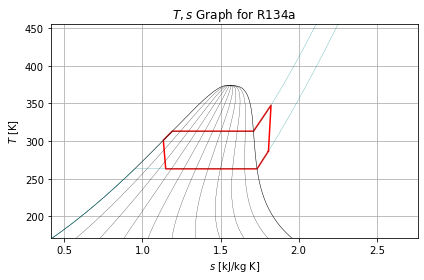

In [14]:
ph_plot = PropertyPlot("R134a", "Ts")
ph_plot.calc_isolines(CoolProp.iQ, num=11)
ph_plot.calc_isolines(CoolProp.iP, iso_range=[P_1/1000, P_2/1000], num=2)
# Configuramos y dibujamos el ciclo

# Las configuraciones se hacen igual que con matplotlib
ph_plot.title(r'$T,s$ Graph for R134a')
ph_plot.xlabel(r'$s$ [kJ/kg K]')
ph_plot.ylabel(r'$T$ [K]')
#ph_plot.set_axis_limits([0, 500, 100, 5000])
ph_plot.grid()

# Creamos el ciclo
ph_plot.draw_process(ref_cycle_intercooler)
ph_plot.show()

Links útiles para revisar todo lo que hablamos:
- http://www.coolprop.org/apidoc/CoolProp.Plots.SimpleCycles.html Acá se explica un poco cómo definir los cambios de estado logarítmicos, pero les subiré un colab con eso más detallado.
- http://www.coolprop.org/coolprop/python-plotting.html Acá se habla de cómo generar los property plots.
